In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Data Collection and Processing

In [5]:
# loading the csv data to a Pandas DataFrames
gold_data = pd.read_csv("gld_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


## Feature Description

In [2]:
# SPX: "Standard and Poor's Index i.e stock market index"
# GLD: "Gold Price"
# USO: "United States Oil Funds i.e Crude oil"
# SLV: "Silver Price"
# EUR/USD: "US Dollar Index"

In [12]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Date']

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
2285   2018-05-08
2286   2018-05-09
2287   2018-05-10
2288   2018-05-14
2289   2018-05-16
Name: Date, Length: 2290, dtype: datetime64[ns]

In [13]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
# number of rows and columns
gold_data.shape

# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [16]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# getting the statistical measures of the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


<Axes: xlabel='GLD', ylabel='Density'>

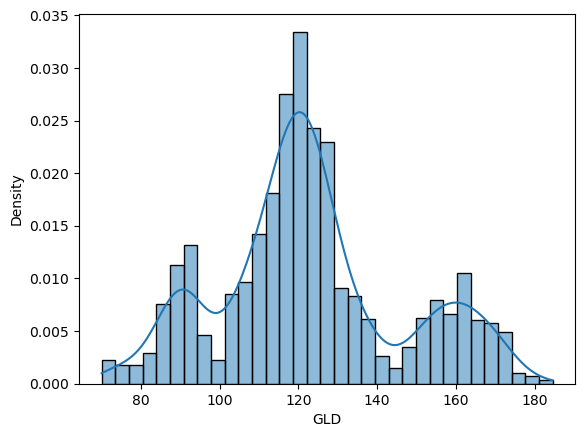

In [15]:
# checking the distribution of the GLD Price
sns.histplot(gold_data['GLD'],kde = True,stat ="density")

## Outlier Detection

In [6]:
numeric_cols = ['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']

def detect_outliers_iqr(gold_data, columns):
    outlier_info = {}
    for col in columns:
        Q1 = gold_data[col].quantile(0.25)
        Q3 = gold_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outlier_info[col] = ((gold_data[col] < lower) | (gold_data[col] > upper)).sum()
    
    return pd.Series(outlier_info, name="Outlier_Count")

detect_outliers_iqr(gold_data, numeric_cols)


GLD        115
SPX          0
USO        134
SLV        117
EUR/USD      0
Name: Outlier_Count, dtype: int64

<Axes: >

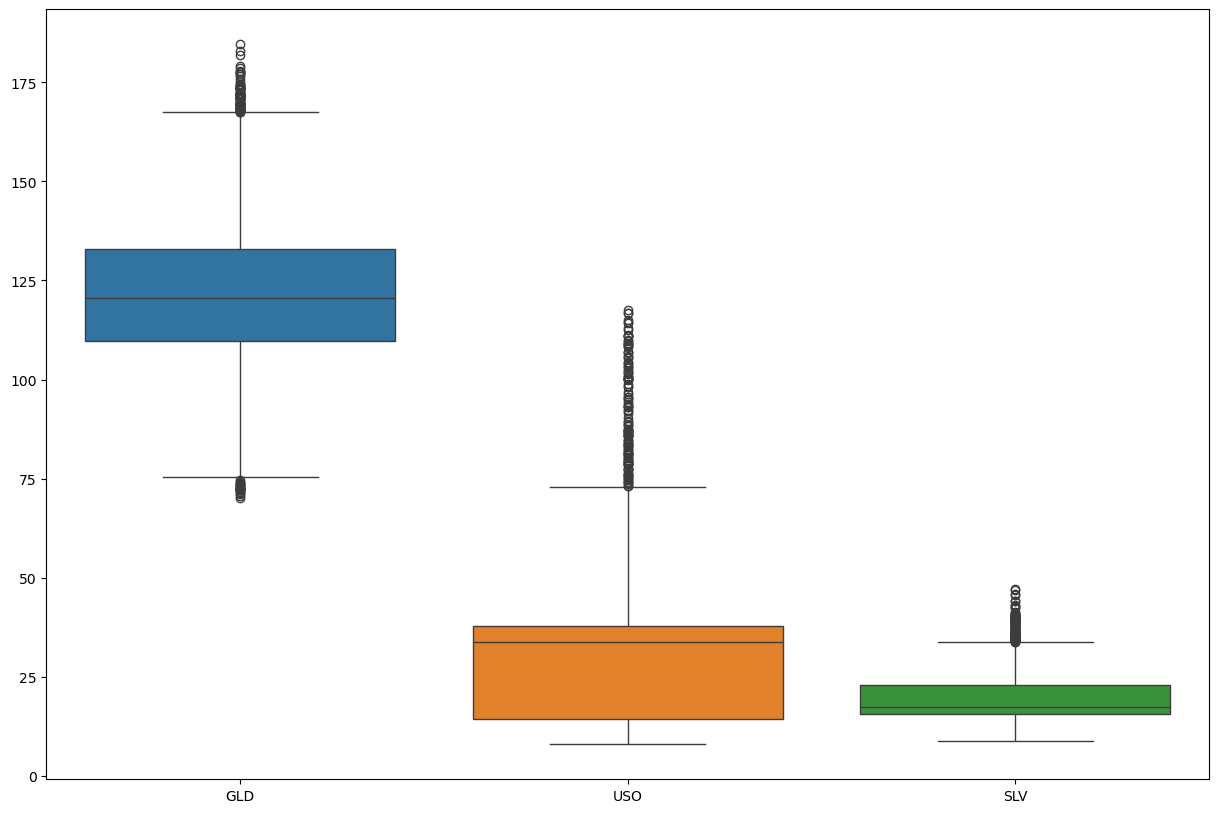

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(gold_data[['GLD','USO','SLV']])

## Treatment Of Outlier Used Capping

In [8]:
def treat_outliers_iqr(gold_data, columns):
    gold_data = gold_data.copy()
    
    for col in columns:
         Q1 = gold_data[col].quantile(0.25)
         Q3 = gold_data[col].quantile(0.75)
         IQR = Q3 - Q1
        
         lower = Q1 - 1.5 * IQR
         upper = Q3 + 1.5 * IQR
         gold_data[col] = np.where(
            gold_data[col] < lower, lower,
            np.where(gold_data[col] > upper, upper, gold_data[col])
        )
    return gold_data


In [9]:
gold_data_lr = treat_outliers_iqr(gold_data, numeric_cols)
gold_data_rf = gold_data.copy()  

In [10]:
gold_data_rf.shape

(2290, 6)

In [11]:
detect_outliers_iqr(gold_data_lr, numeric_cols)

GLD        0
SPX        0
USO        0
SLV        0
EUR/USD    0
Name: Outlier_Count, dtype: int64

## Exploratory Data Analysis(EDA)

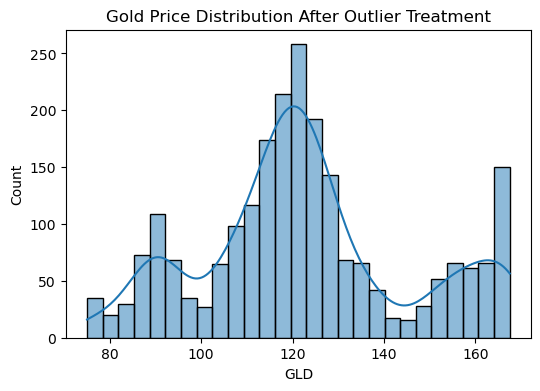

In [14]:
# checking the distribution of the GLD Price after oulier
plt.figure(figsize=(6,4))
sns.histplot(gold_data_lr['GLD'], kde=True)
plt.title('Gold Price Distribution After Outlier Treatment')
plt.show()

## Correlation:
   ### 1. Positive Correlation
   ### 2. Negative Correlation

In [24]:
numeric_columns = gold_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

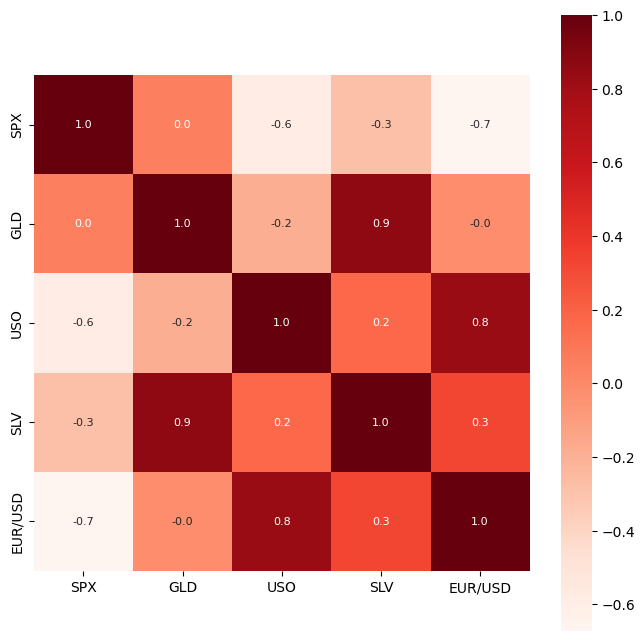

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [26]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


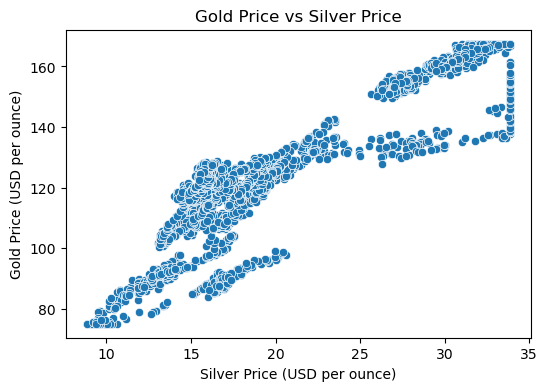

In [20]:
# Gold vs Silver
plt.figure(figsize=(6,4))
sns.scatterplot(x=gold_data_lr['SLV'], y=gold_data_lr['GLD'])
plt.title('Gold Price vs Silver Price')
plt.xlabel('Silver Price (USD per ounce)')
plt.ylabel('Gold Price (USD per ounce)')
plt.show()

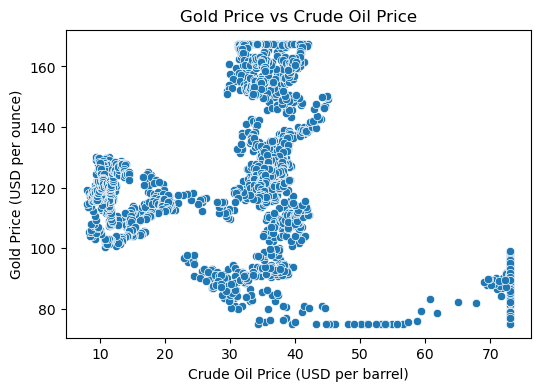

In [23]:
# Gold vs Crude Oil
plt.figure(figsize=(6,4))
sns.scatterplot(x=gold_data_lr['USO'], y=gold_data_lr['GLD'])
plt.title('Gold Price vs Crude Oil Price')
plt.xlabel('Crude Oil Price (USD per barrel)')
plt.ylabel('Gold Price (USD per ounce)')
plt.show()

## Splitting the Features and Target

In [28]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

print("="*30)

print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Split into Training data and Test Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Model Training: Multiple Linear Regression and Random Forest

In [30]:
# Model 1:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, Y_train)


LinearRegression()

In [31]:
# Model 2:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=2)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=2)

## Model Evaluation

In [32]:
# Make predictions on the test data
# Model 1:
lr_predictions = lr_regressor.predict(X_test)

# Model 2:
rf_predictions = rf_regressor.predict(X_test)

In [33]:
# Calculate the R-squared error to evaluate performance
# Model 1:
lr_error_score = metrics.r2_score(Y_test, lr_predictions)
print(f"Linear Regression R-squared error : {lr_error_score:.4f}")
lr_mean_abs_error = metrics.mean_absolute_error(Y_test, lr_predictions)
print(f"Linear Regression mean absolute error : {lr_mean_abs_error :.4f}")
print("="*30)

# Model 2:
rf_error_score = metrics.r2_score(Y_test, rf_predictions)
print(f"Random Forest R-squared Score: {rf_error_score:.4f}")
rf_mean_abs_error = metrics.mean_absolute_error(Y_test, rf_predictions)
print(f"Random Forest mean absolute error : {rf_mean_abs_error :.4f}")


Linear Regression R-squared error : 0.8658
Linear Regression mean absolute error : 5.9115
Random Forest R-squared Score: 0.9885
Random Forest mean absolute error : 1.3519


## Compare the Acutal Values and Predicted Values in a Plot

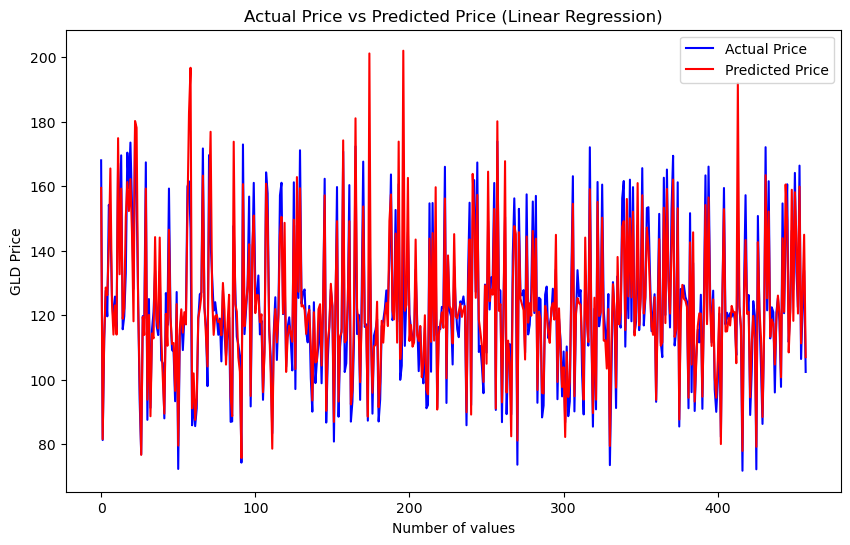

In [34]:
plt.figure(figsize=(10, 6))
# Convert the Y_test Series to a list for plotting
Y_test_list = list(Y_test)

# Plotting Linear Regression predictions
plt.plot(Y_test_list, color='blue', label = 'Actual Price')
plt.plot(lr_predictions, color='red', label = 'Predicted Price')
plt.title('Actual Price vs Predicted Price (Linear Regression)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

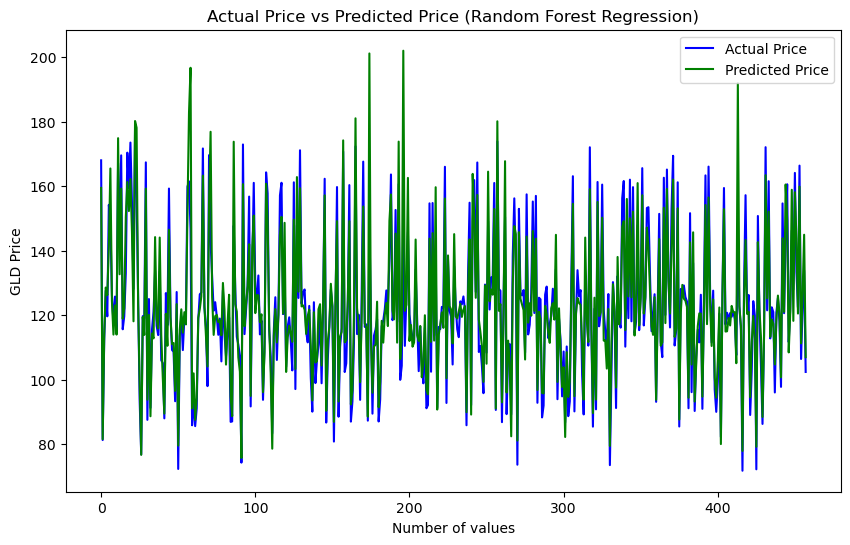

In [35]:
plt.figure(figsize=(10, 6))
# Convert the  pandas Y_test Series to a list for plotting
Y_test_list = list(Y_test)

# Plotting Random Forest Regression predictions
plt.plot(Y_test_list, color='blue', label = 'Actual Price')
plt.plot(lr_predictions, color='green', label = 'Predicted Price')
plt.title('Actual Price vs Predicted Price (Random Forest Regression)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()